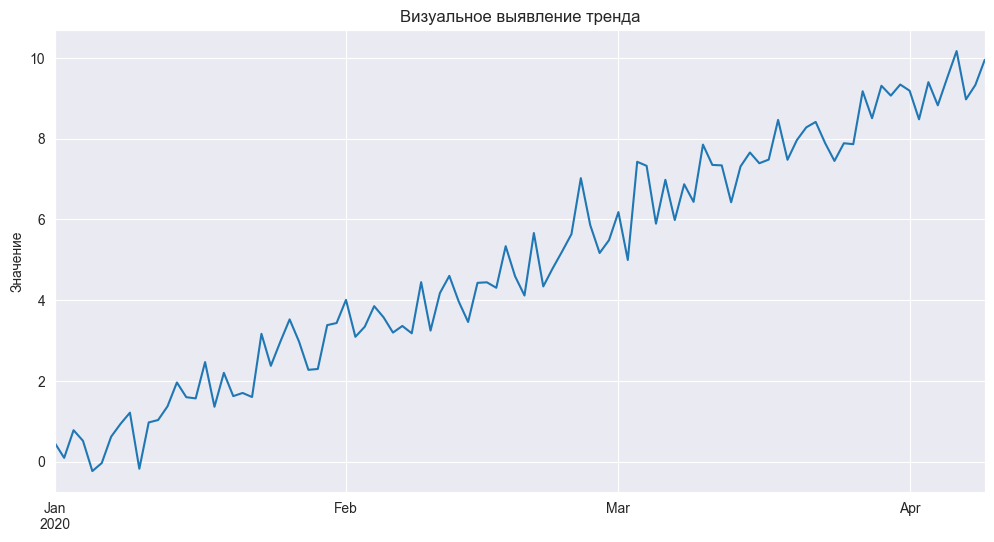

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Генерация данных с трендом
dates = pd.date_range('2020-01-01', periods=100)
trend = 0.1 * np.arange(100)
noise = np.random.normal(0, 0.5, 100)
data = pd.Series(trend + noise, index=dates)

# Построение графика
plt.figure(figsize=(12, 6))
data.plot(title='Визуальное выявление тренда')
plt.ylabel('Значение')
plt.grid(True)
plt.show()

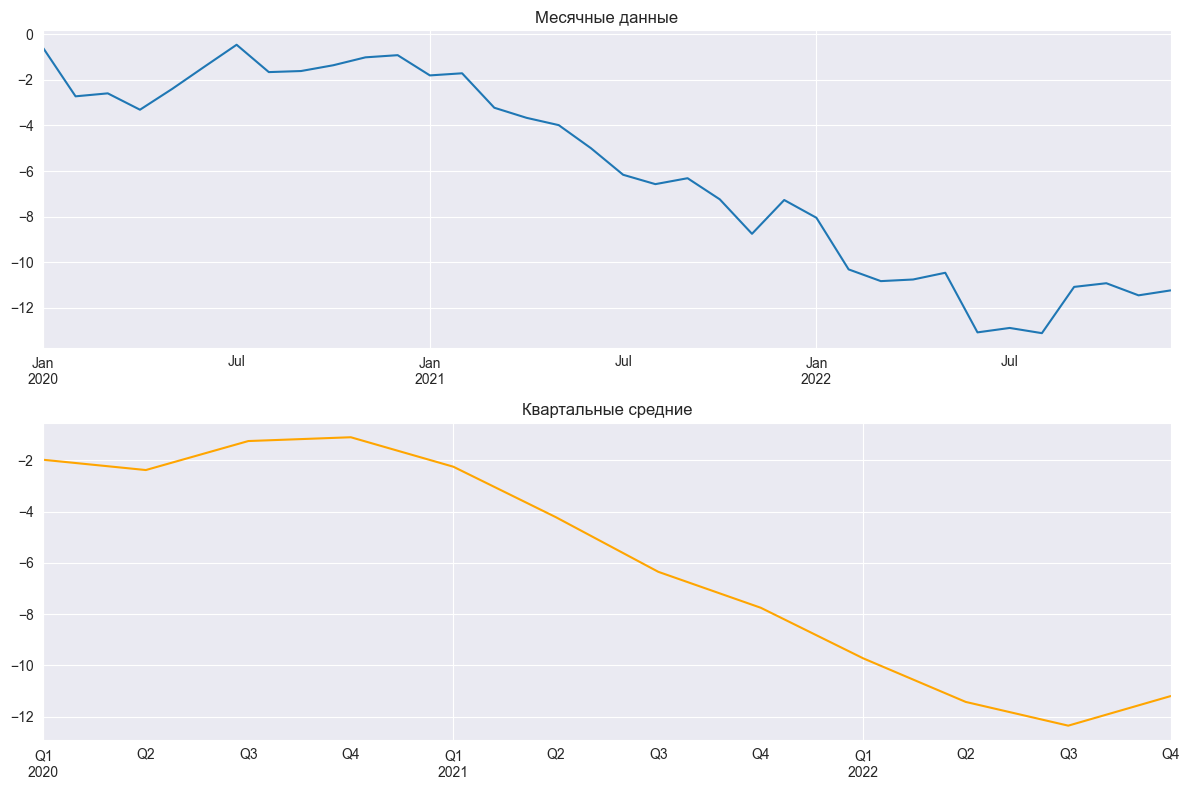

In [2]:
# Исходные месячные данные
monthly_data = pd.Series(np.random.randn(36).cumsum(),
                         index=pd.date_range('2020-01', periods=36, freq='ME'))

# Квартальная агрегация
quarterly_data = monthly_data.resample('QE').mean()

# Визуальное сравнение
fig, ax = plt.subplots(2, 1, figsize=(12, 8))
monthly_data.plot(ax=ax[0], title='Месячные данные')
quarterly_data.plot(ax=ax[1], title='Квартальные средние', color='orange')
plt.tight_layout()

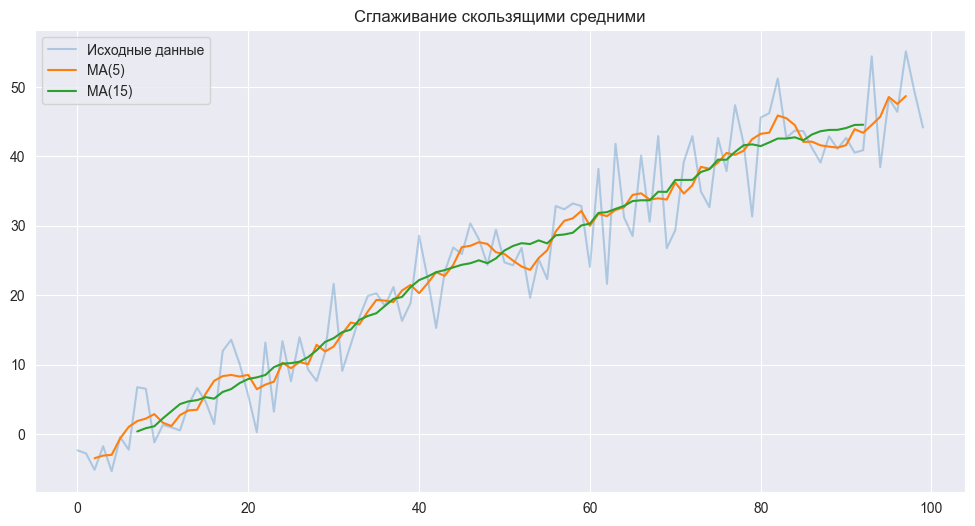

In [3]:
# Исходные данные с трендом и шумом
data = pd.Series(0.5 * np.arange(100) + np.random.normal(0, 5, 100))

# Скользящие средние с окнами 5 и 15
data_ma5 = data.rolling(window=5, center=True).mean()
data_ma15 = data.rolling(window=15, center=True).mean()

# Визуализация
plt.figure(figsize=(12, 6))
data.plot(alpha=0.3, label='Исходные данные')
data_ma5.plot(label='MA(5)')
data_ma15.plot(label='MA(15)')
plt.legend()
plt.title('Сглаживание скользящими средними')
plt.show()

In [4]:
from statsmodels.tsa.stattools import adfuller

# Генерация данных с квадратичным трендом
t = np.arange(100)
y = 0.1 * t + 0.02 * t ** 2 + np.random.normal(0, 2, 100)

# Вычисление первых и вторых разностей
diff1 = np.diff(y, n=1)
diff2 = np.diff(y, n=2)

# Тест Дики-Фуллера на стационарность
print(f"ADF исходного ряда: {adfuller(y)[1]:.3f}")
print(f"ADF первых разностей: {adfuller(diff1)[1]:.3f}")
print(f"ADF вторых разностей: {adfuller(diff2)[1]:.3f}")

ADF исходного ряда: 1.000
ADF первых разностей: 0.929
ADF вторых разностей: 0.000


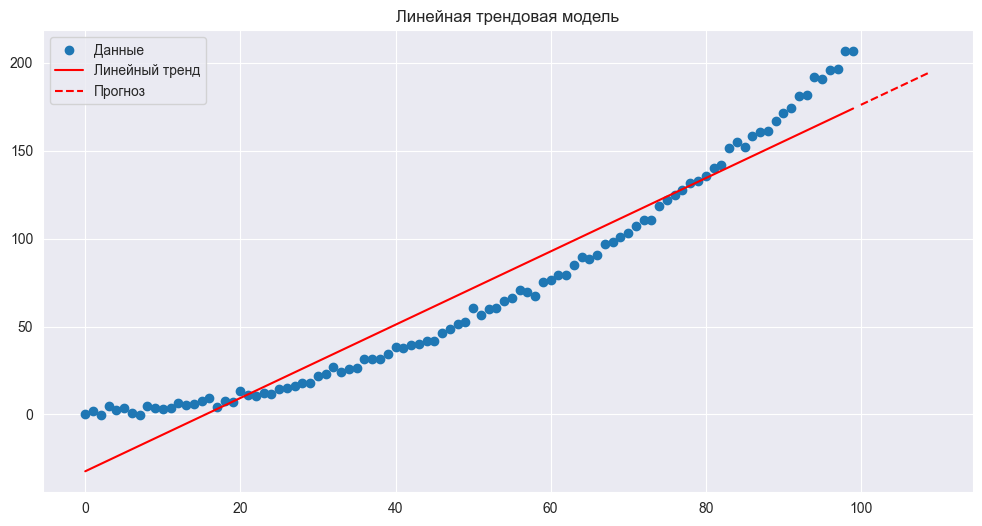

In [5]:
from sklearn.linear_model import LinearRegression

# Подготовка данных
X = t.reshape(-1, 1)  # Временные метки
model = LinearRegression()
model.fit(X, y)

# Прогноз на 10 периодов вперед
future_t = np.arange(100, 110).reshape(-1, 1)
forecast = model.predict(future_t)

# Визуализация
plt.figure(figsize=(12, 6))
plt.scatter(t, y, label='Данные')
plt.plot(t, model.predict(X), 'r', label='Линейный тренд')
plt.plot(future_t, forecast, 'r--', label='Прогноз')
plt.legend()
plt.title('Линейная трендовая модель')
plt.show()

In [11]:
f'y(t) = {round(model.coef_[0], 2)} * t + {round(model.intercept_, 2)} + {round((y - model.predict(X)).mean(), 2)}'

'y(t) = 2.08 * t + -32.27 + 0.0'

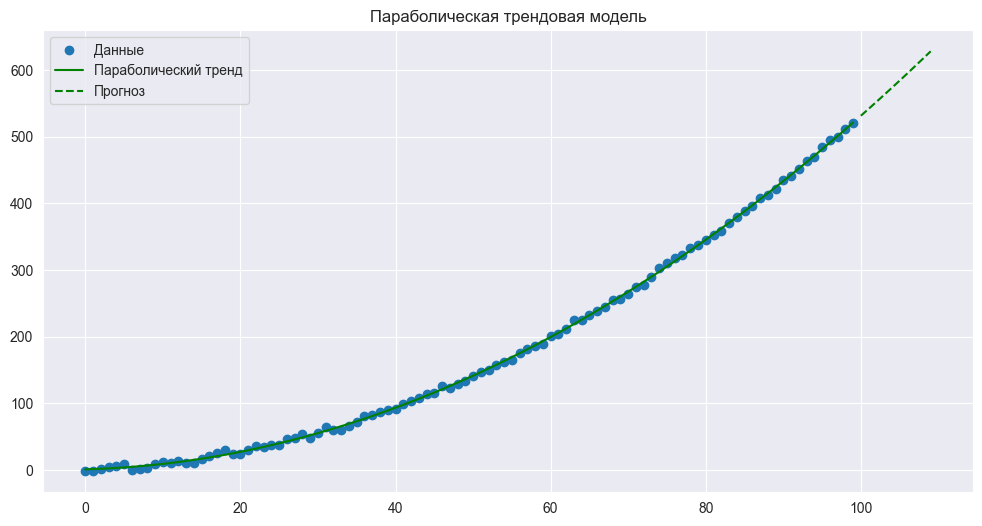

In [12]:
# Генерация данных с квадратичным трендом
y_quad = 2 + 0.3 * t + 0.05 * t ** 2 + np.random.normal(0, 3, 100)

# Обучение полиномиальной модели 2-й степени
X_poly = np.column_stack([t, t ** 2])
model_poly = LinearRegression()
model_poly.fit(X_poly, y_quad)

# Прогноз
future_X = np.column_stack([future_t, future_t ** 2])
forecast_poly = model_poly.predict(future_X)

# Визуализация
plt.figure(figsize=(12, 6))
plt.scatter(t, y_quad, label='Данные')
plt.plot(t, model_poly.predict(X_poly), 'g', label='Параболический тренд')
plt.plot(future_t, forecast_poly, 'g--', label='Прогноз')
plt.legend()
plt.title('Параболическая трендовая модель')
plt.show()

In [13]:
model_poly.coef_

array([0.31377358, 0.04991077])

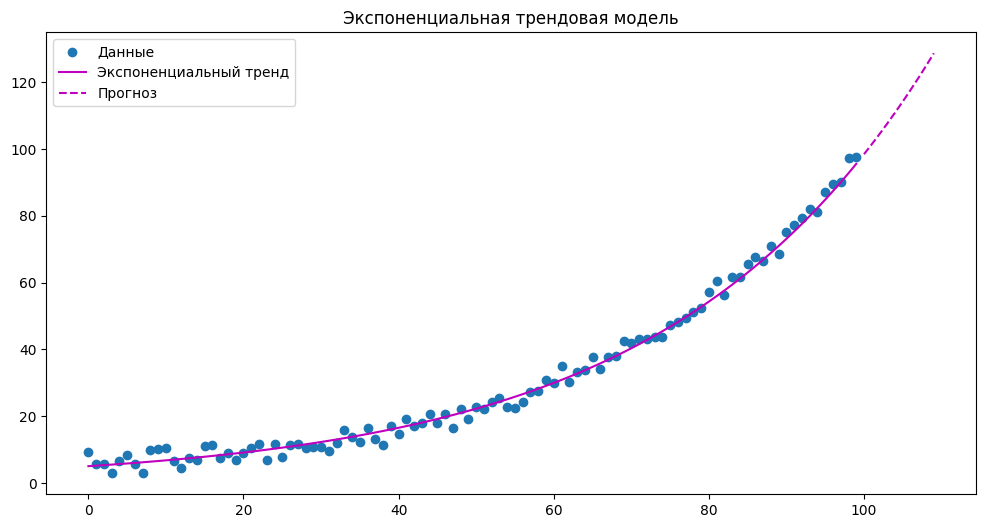

In [12]:
# Генерация экспоненциального тренда
y_exp = 5 * np.exp(0.03 * t) + np.random.normal(0, 2, 100)

# Линеаризация данных
y_log = np.log(y_exp)

# Обучение линейной модели на логарифмах
model_exp = LinearRegression()
model_exp.fit(X, y_log)

# Обратное преобразование
a = np.exp(model_exp.intercept_)
b = model_exp.coef_[0]

# Прогноз
forecast_exp = a * np.exp(b * future_t)

# Визуализация
plt.figure(figsize=(12, 6))
plt.scatter(t, y_exp, label='Данные')
plt.plot(t, a * np.exp(b * t), 'm', label='Экспоненциальный тренд')
plt.plot(future_t, forecast_exp, 'm--', label='Прогноз')
plt.legend()
plt.title('Экспоненциальная трендовая модель')
plt.show()

## Логистическая модель

$$y_{t} = \frac{L}{1 + e^{-k(t - t_{0})}} + \epsilon_{t} $$

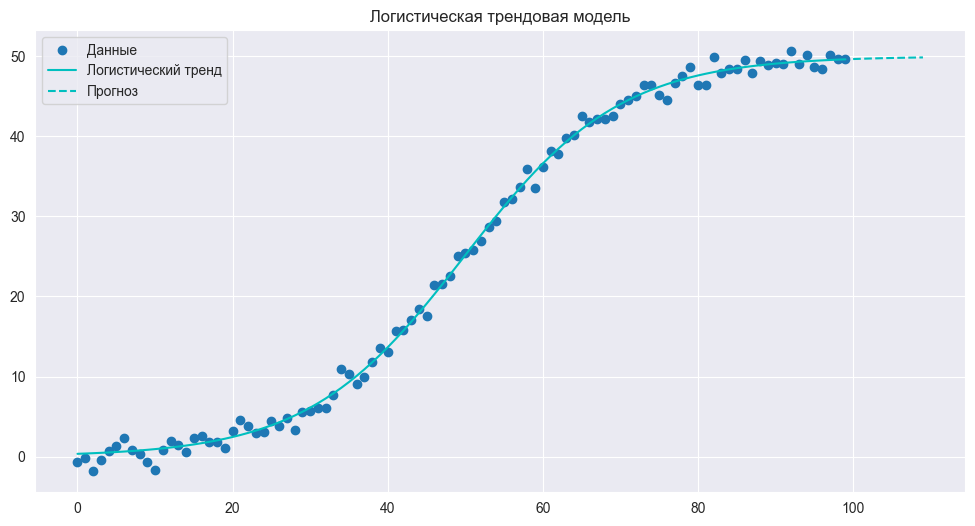

In [14]:
from scipy.optimize import curve_fit


# Функция логистической кривой
def logistic(t, L, k, t0):
    return L / (1 + np.exp(-k * (t - t0)))


# Генерация данных
L_true = 50
k_true = 0.1
t0_true = 50
y_logistic = logistic(t, L_true, k_true, t0_true) + np.random.normal(0, 1, 100)

# Подбор параметров
popt, pcov = curve_fit(logistic, t, y_logistic, p0=[30, 0.05, 40])

# Прогноз
forecast_logistic = logistic(future_t, *popt)

# Визуализация
plt.figure(figsize=(12, 6))
plt.scatter(t, y_logistic, label='Данные')
plt.plot(t, logistic(t, *popt), 'c', label='Логистический тренд')
plt.plot(future_t, forecast_logistic, 'c--', label='Прогноз')
plt.legend()
plt.title('Логистическая трендовая модель')
plt.show()

In [15]:
popt

array([49.99723788,  0.09920641, 49.85749922])

In [17]:
from statsmodels.stats.diagnostic import acorr_ljungbox
import statsmodels.api as sm

# Сравнение линейной и параболической моделей
models = {
    'Linear': LinearRegression().fit(X, y),
    'Quadratic': LinearRegression().fit(X_poly, y_quad)
}

for name, model in models.items():
    residuals = y - model.predict(X_poly if name == 'Quadratic' else X)
    print(f"\n{name} Model:")
    print(f"R²: {model.score(X_poly if name == 'Quadratic' else X, y):.3f}")
    print(f"AIC: {2 * len(model.coef_) - 2 * np.log(np.sum(residuals ** 2)):.1f}")
    print(f"DW: {sm.stats.stattools.durbin_watson(residuals):.2f}")
    print(f"Ljung-Box p-value: {acorr_ljungbox(residuals, lags=5).loc[1, 'lb_pvalue']:.3f}")


Linear Model:
R²: 0.936
AIC: -18.2
DW: 0.04
Ljung-Box p-value: 0.000

Quadratic Model:
R²: -4.408
AIC: -25.1
DW: 0.00
Ljung-Box p-value: 0.000


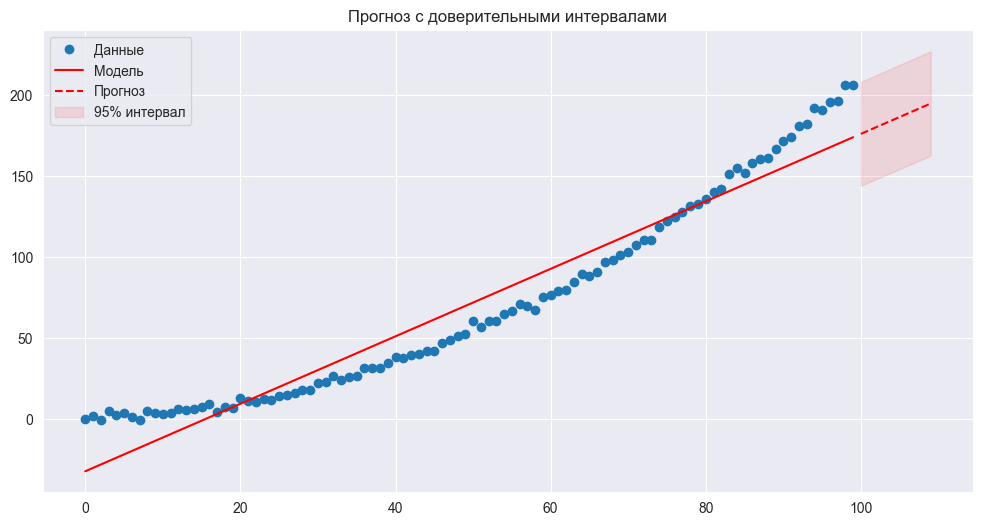

In [18]:
# Для линейной модели
X_with_const = sm.add_constant(X)
model_ols = sm.OLS(y, X_with_const).fit()

# Прогноз и интервалы
forecast = model_ols.get_prediction(sm.add_constant(future_t))
forecast_df = forecast.summary_frame(alpha=0.05)

# Визуализация
plt.figure(figsize=(12, 6))
plt.plot(t, y, 'o', label='Данные')
plt.plot(t, model_ols.fittedvalues, 'r', label='Модель')
plt.plot(future_t, forecast_df['mean'], 'r--', label='Прогноз')
plt.fill_between(future_t.flatten(),
                 forecast_df['obs_ci_lower'],
                 forecast_df['obs_ci_upper'],
                 color='r', alpha=0.1, label='95% интервал')
plt.legend()
plt.title('Прогноз с доверительными интервалами')
plt.show()

In [20]:
model_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     1443.
Date:                Mon, 24 Mar 2025   Prob (F-statistic):           1.94e-60
Time:                        14:27:38   Log-Likelihood:                -417.05
No. Observations:                 100   AIC:                             838.1
Df Residuals:                      98   BIC:                             843.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -32.2721      3.142    -10.272      0.000     -38.507     -26.037
x1             2.0827      0.055     37.986      0.000       1.974       2.192
==============================================================================
Omnibus:                       14.091   Durbin-Watson:                   0.037
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                9.712
Skew:                           0.632   Prob(JB):                      0.00778
Kurtosis:                       2.143   Cond. No.                         114.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

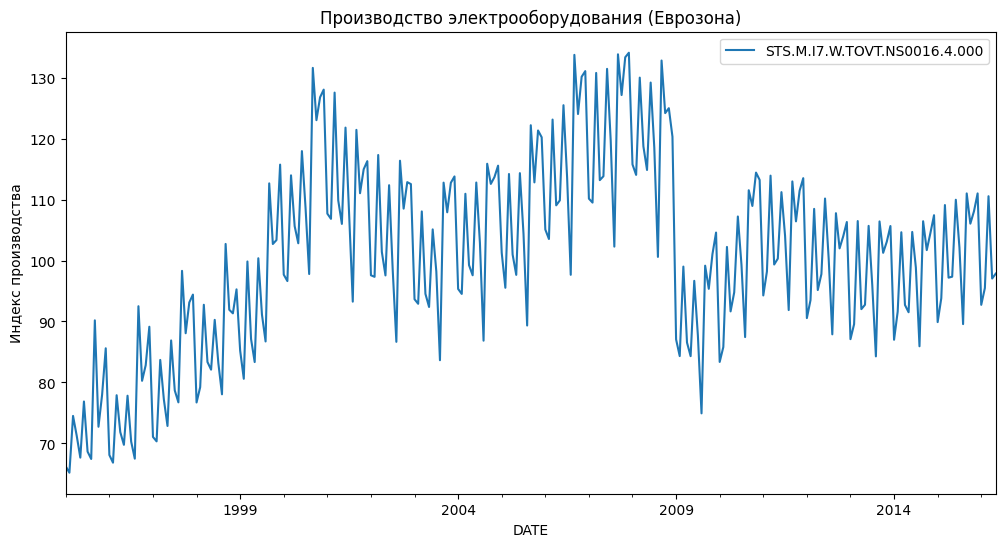

In [139]:
import matplotlib.pyplot as plt
from statsmodels.datasets import elec_equip as ds

# Загрузка данных производства электрооборудования
data = ds.load().data
data.index = pd.DatetimeIndex(data.index, freq='MS')
data.plot(figsize=(12, 6), title='Производство электрооборудования (Еврозона)')
plt.ylabel('Индекс производства')
plt.show()

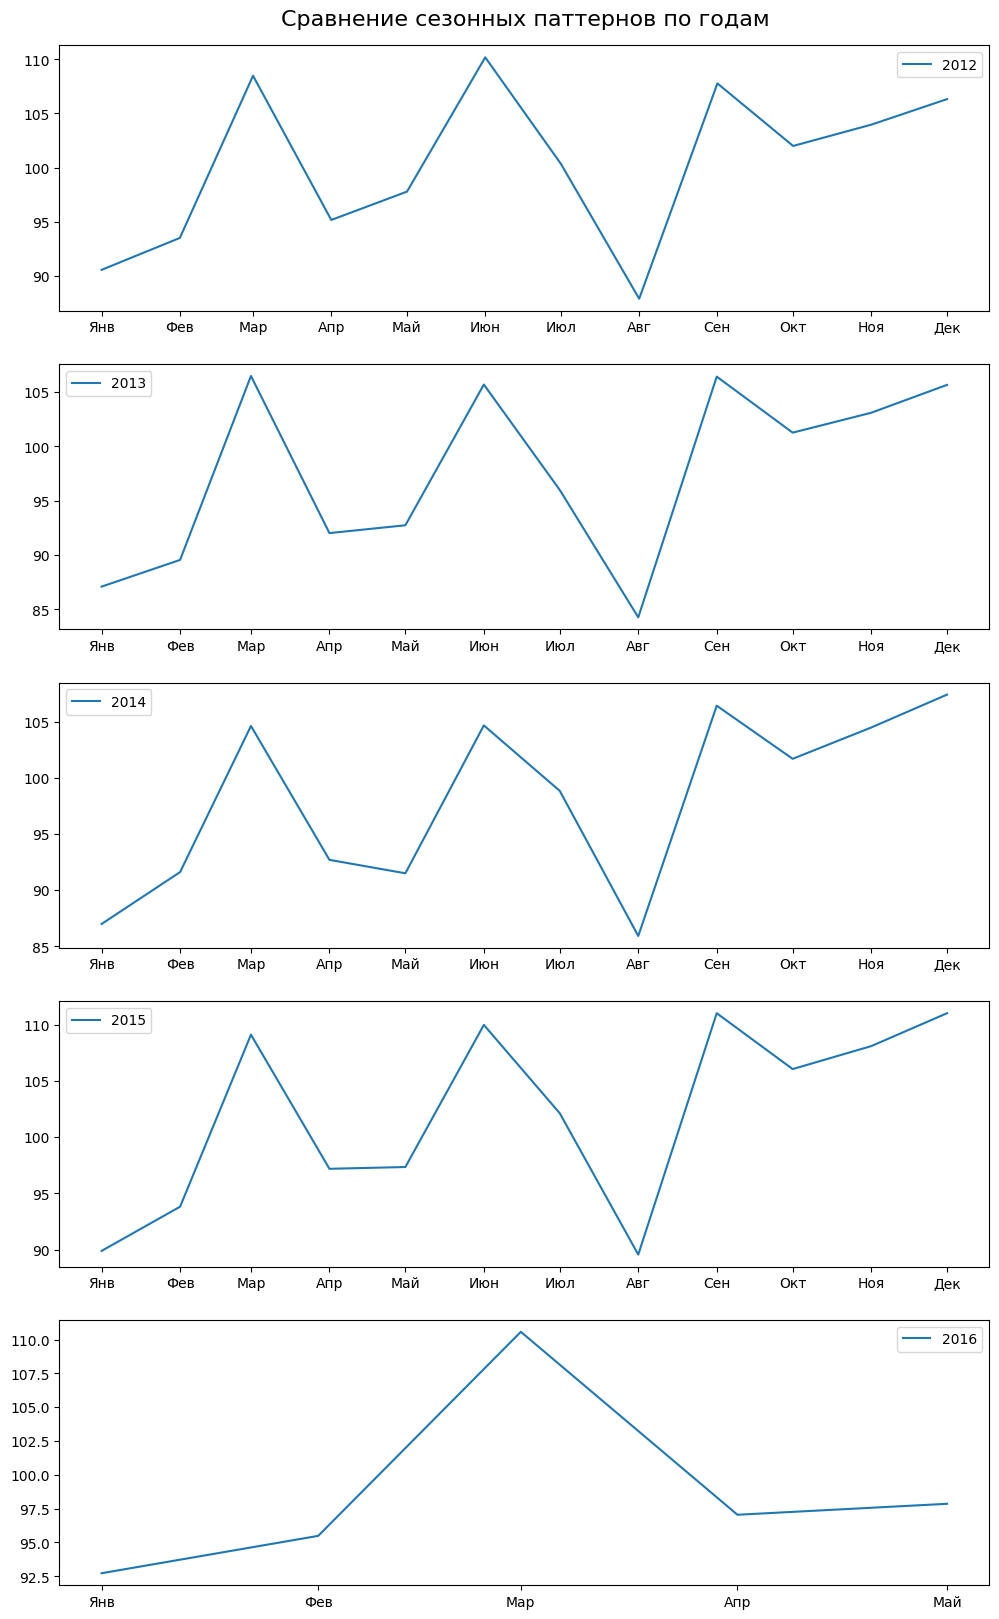

In [140]:
years = data.index.year.unique()
fig, ax = plt.subplots(5, 1, figsize=(12, 20))
fig.text(0.31, 0.89, 'Сравнение сезонных паттернов по годам', fontsize=16)
for i in range(5):
    filter_year = data.index.year == years[-5 + i]
    ax[i].plot(data[filter_year], label=years[-5 + i])
    ax[i].set_xticks(data[filter_year].index)
    ax[i].set_xticklabels(
        ['Янв', 'Фев', 'Мар', 'Апр', 'Май', 'Июн', 'Июл', 'Авг', 'Сен', 'Окт', 'Ноя', 'Дек'][:len(data[filter_year])])
    ax[i].legend()
plt.show()

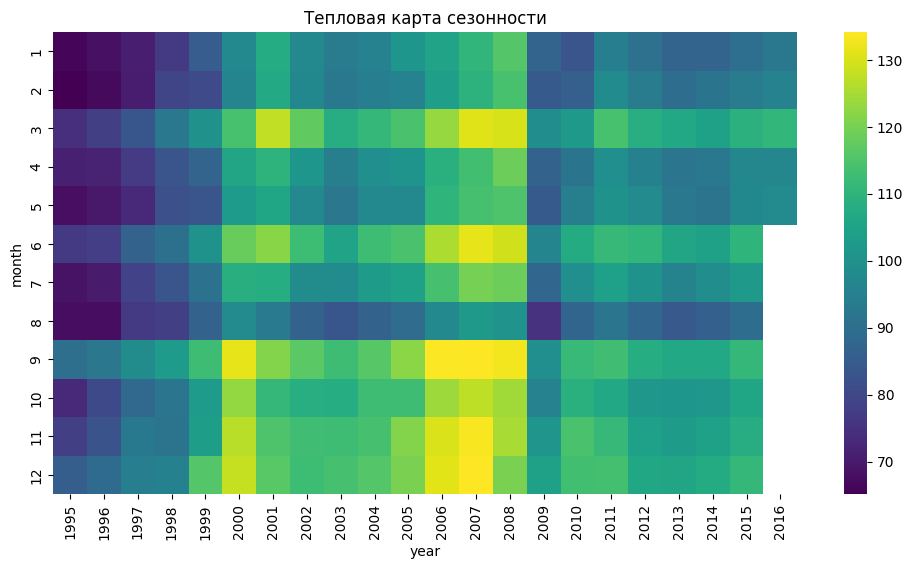

In [141]:
import seaborn as sns

data_pivot = data.reset_index()
data_pivot['year'] = data_pivot['DATE'].dt.year
data_pivot['month'] = data_pivot['DATE'].dt.month
heatmap_data = data_pivot.pivot(index="month", columns="year", values="STS.M.I7.W.TOVT.NS0016.4.000")

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='viridis')
plt.title('Тепловая карта сезонности')
plt.show()

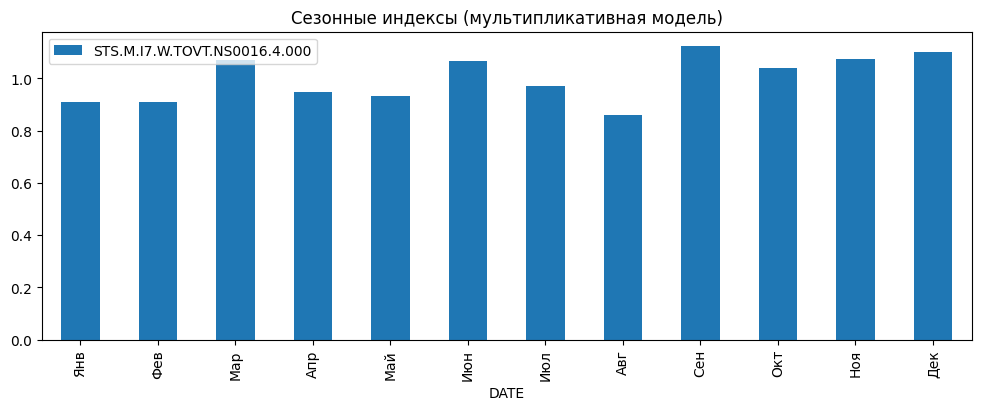

In [142]:
# Расчет центрированной скользящей средней за 12 месяцев
ma_12 = data.rolling(window=12, center=True).mean()

# Вычисление сезонной компоненты (мультипликативная модель)
seasonal = data / ma_12

# Усреднение по месяцам
seasonal_index = seasonal.groupby(seasonal.index.month).mean()

# Визуализация
seasonal_index.plot(kind='bar', figsize=(12, 4))
plt.title('Сезонные индексы (мультипликативная модель)')
plt.xticks(range(12), ['Янв', 'Фев', 'Мар', 'Апр', 'Май', 'Июн', 'Июл', 'Авг', 'Сен', 'Окт', 'Ноя', 'Дек'])
plt.show()

In [143]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import q_stat

# Декомпозиция ряда
result = seasonal_decompose(data, model='multiplicative', period=12)

# Тест QS на остатках
qs_stat, p_values = q_stat(result.resid.dropna(), 12)
print(f"QS-тест: p-value = {p_values[-1]:.3f}")

QS-тест: p-value = 0.000


C:\Users\kgalanov\PycharmProjects\DDDA\.venv\Lib\site-packages\statsmodels\tsa\stattools.py:570: RuntimeWarning: divide by zero encountered in divide
  * np.cumsum((1.0 / (nobs - np.arange(1, len(x) + 1))) * x ** 2)


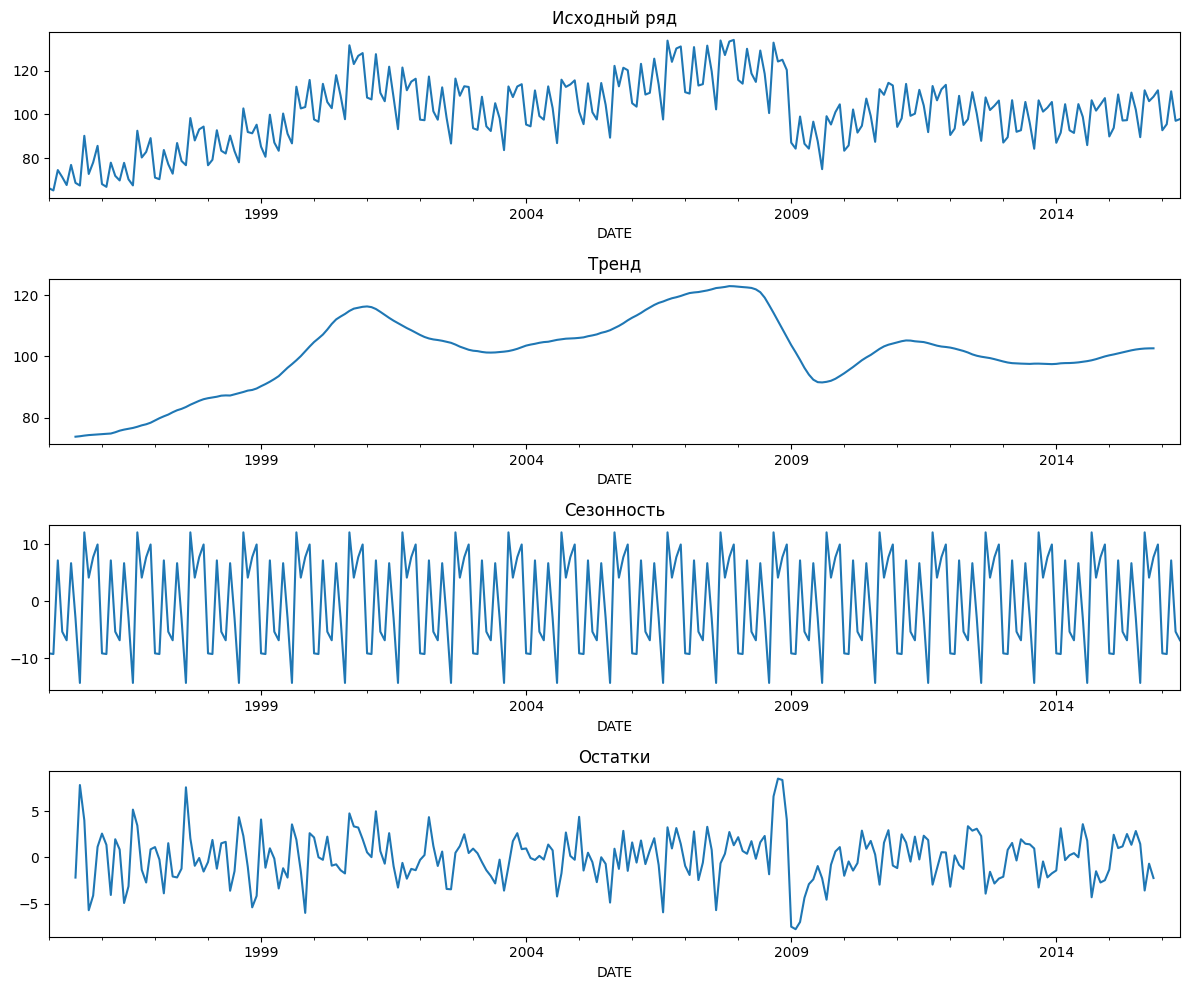

In [144]:
# Аддитивная декомпозиция
result_add = seasonal_decompose(data, model='additive', period=12)

# Визуализация компонент
fig, axes = plt.subplots(4, 1, figsize=(12, 10))
result_add.observed.plot(ax=axes[0], title='Исходный ряд')
result_add.trend.plot(ax=axes[1], title='Тренд')
result_add.seasonal.plot(ax=axes[2], title='Сезонность')
result_add.resid.plot(ax=axes[3], title='Остатки')
plt.tight_layout()
plt.show()

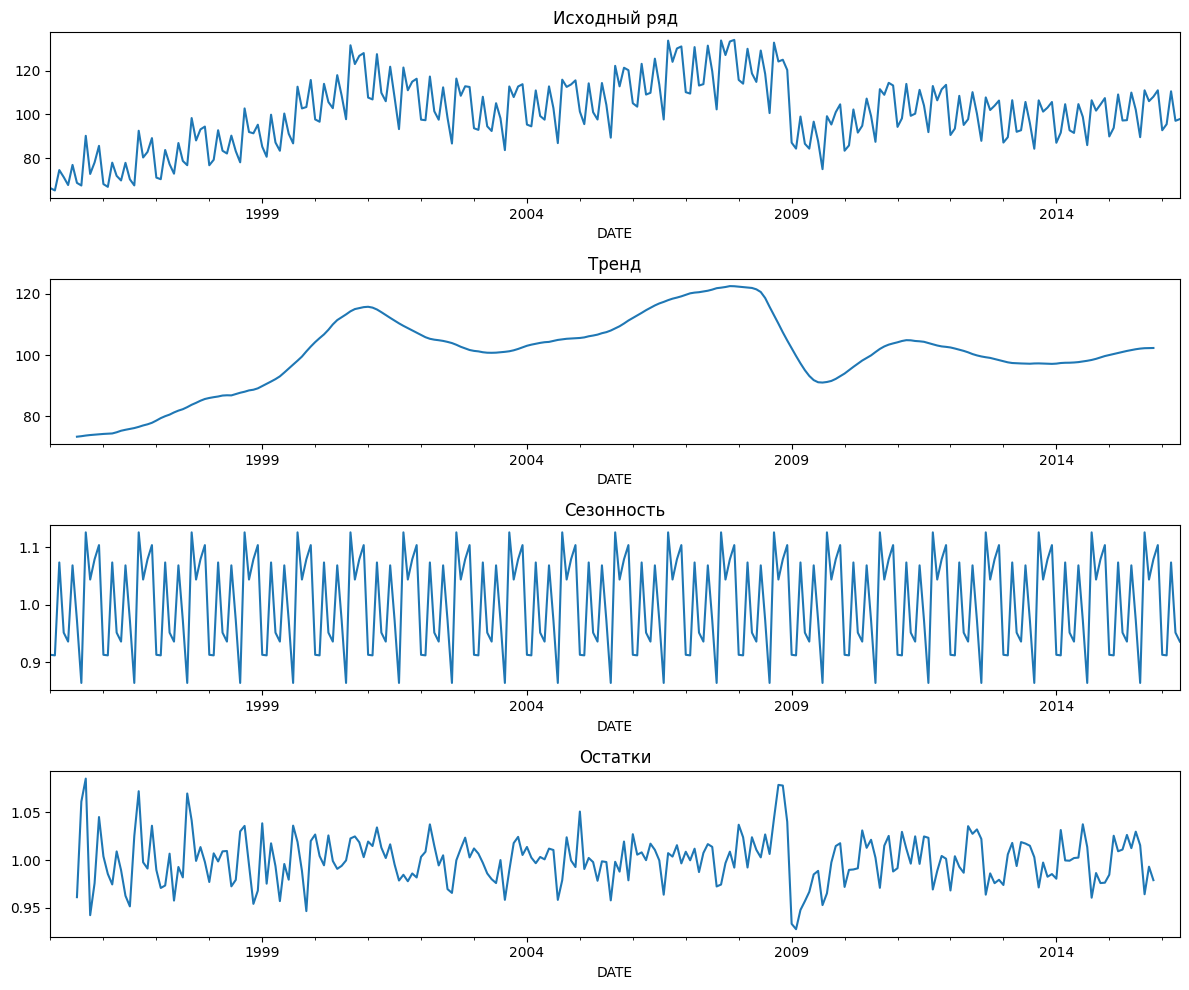

In [145]:
# Мультипликативная декомпозиция
result_mul = seasonal_decompose(data, model='multiplicative', period=12)

# Логарифмическое преобразование для аддитивной работы
data_log = np.log(data)
result_log = seasonal_decompose(data_log, model='additive', period=12)

# Обратное преобразование
trend = np.exp(result_log.trend)
seasonal = np.exp(result_log.seasonal)
residual = np.exp(result_log.resid)

fig, axes = plt.subplots(4, 1, figsize=(12, 10))
result_mul.observed.plot(ax=axes[0], title='Исходный ряд')
trend.plot(ax=axes[1], title='Тренд')
seasonal.plot(ax=axes[2], title='Сезонность')
residual.plot(ax=axes[3], title='Остатки')
plt.tight_layout()
plt.show()

## Гармоническая модель

$$ S_t = \sum_{k=1}^{m} {\alpha_k * cos{\frac{2\pi k t}{P}} + \beta_k * sin{\frac{2\pi k t}{P}}}$$

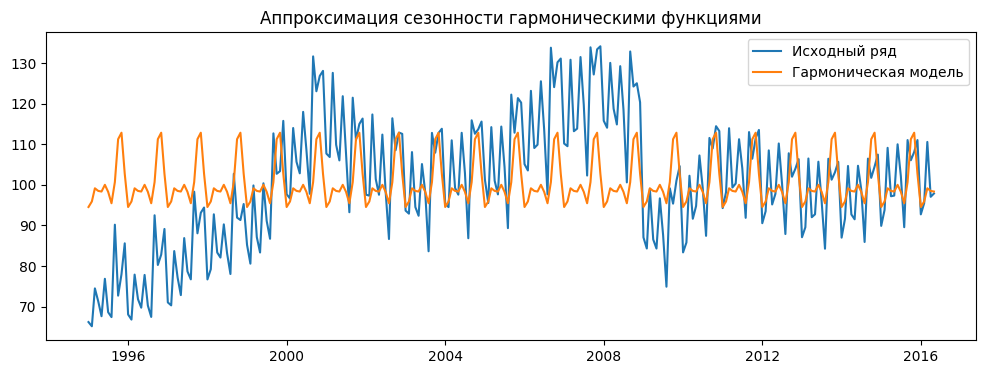

In [146]:
from sklearn.linear_model import LinearRegression


# Создание гармонических признаков
def harmonic_features(index, period, num_terms):
    t = np.arange(len(index))
    features = []
    for k in range(1, num_terms + 1):
        features.append(np.cos(2 * np.pi * k * t / period))
        features.append(np.sin(2 * np.pi * k * t / period))
    return np.column_stack(features)


# Подготовка данных
X = harmonic_features(data.index, period=12, num_terms=3)
y = data.values.reshape(-1, 1)

# Обучение модели
model = LinearRegression().fit(X, y)

# Прогноз сезонности
seasonal_pred = model.predict(X)

# Визуализация
plt.figure(figsize=(12, 4))
plt.plot(data.index, data, label='Исходный ряд')
plt.plot(data.index, seasonal_pred, label='Гармоническая модель')
plt.legend()
plt.title('Аппроксимация сезонности гармоническими функциями')
plt.show()

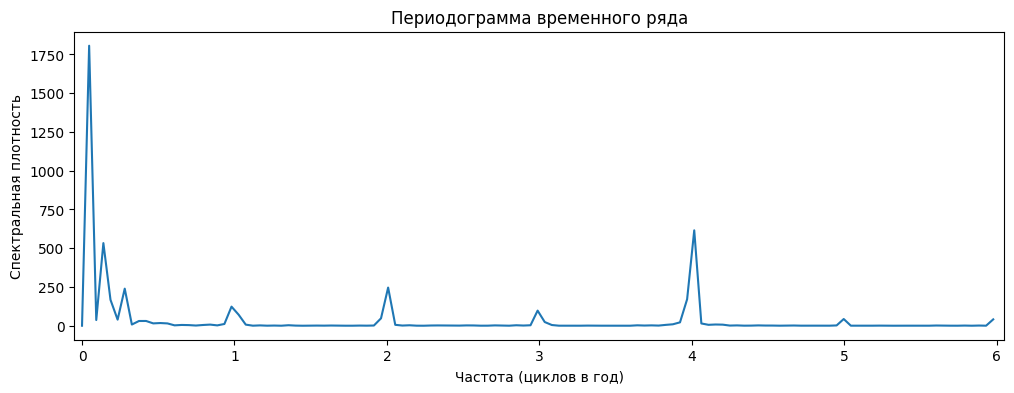

In [147]:
from scipy.signal import periodogram

frequencies, spectrum = periodogram(data.values.squeeze(), fs=12, detrend='linear')

# Визуализация основных частот
plt.figure(figsize=(12, 4))
plt.plot(frequencies, spectrum)
plt.xlim(-0.05, 6.05)
plt.xlabel('Частота (циклов в год)')
plt.ylabel('Спектральная плотность')
plt.title('Периодограмма временного ряда')
plt.show()

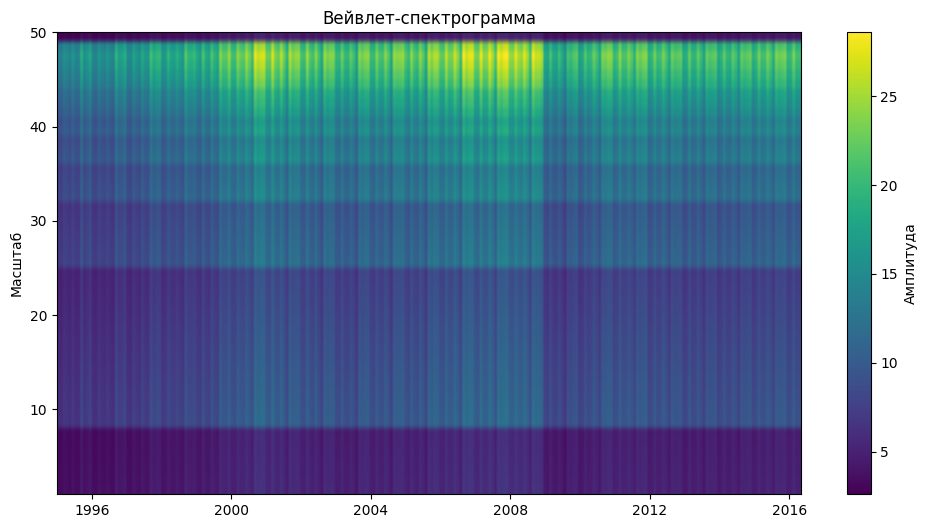

In [148]:
import pywt

# Выбор вейвлет-функции
wavelet = 'cmor1.5-1.0'
scales = np.arange(1, 50)

# Вычисление вейвлет-преобразования
coefficients, frequencies = pywt.cwt(data, scales, wavelet)

# Визуализация вейвлет-спектрограммы
plt.figure(figsize=(12, 6))
plt.imshow(np.abs(coefficients), aspect='auto', cmap='viridis',
           extent=[data.index[0], data.index[-1], 1, 50])
plt.colorbar(label='Амплитуда')
plt.title('Вейвлет-спектрограмма')
plt.ylabel('Масштаб')
plt.show()

In [149]:
# Сезонная дифференциация (лаг 12 месяцев)
data_diff = data.diff(12).dropna()

# Проверка стационарности
from statsmodels.tsa.stattools import adfuller

print(f"ADF p-value: {adfuller(data_diff)[1]:.3f}")

ADF p-value: 0.047


<Figure size 1200x600 with 0 Axes>

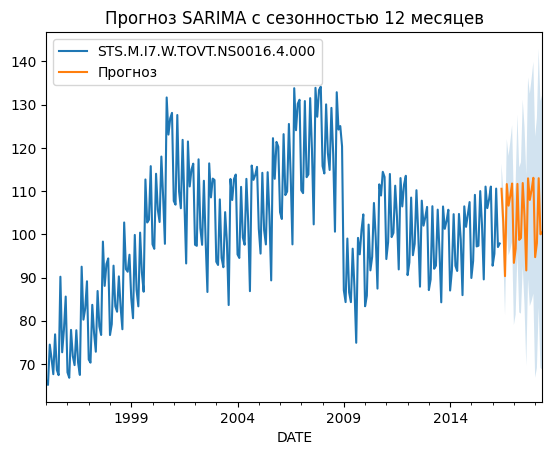

In [150]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit(disp=False)

# Прогноз на 24 месяца
forecast = results.get_forecast(steps=24)
conf_int = forecast.conf_int()

# Визуализация
plt.figure(figsize=(12, 6))
data.plot(label='Исторические данные')
forecast.predicted_mean.plot(label='Прогноз')
plt.fill_between(conf_int.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], alpha=0.2)
plt.title('Прогноз SARIMA с сезонностью 12 месяцев')
plt.legend()
plt.show()